<a href="https://colab.research.google.com/github/souravmanoj/MATCH-RESULT/blob/main/Italy_Football_Project_ProposedCode_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing pandas library for data manipulation and analysis
import pandas as pndas

# Importing numpy for numerical operations and array handling
import numpy as nmpy

# Importing matplotlib for data visualization using plots
import matplotlib.pyplot as MtPlot

# Importing seaborn for statistical data visualization
import seaborn as sBorn

# Importing Plotly Express for interactive data visualization
import plotly.express as POX

# Importing LabelEncoder to convert categorical labels to numerical format
from sklearn.preprocessing import LabelEncoder

# Importing ADASYN for handling class imbalance by generating synthetic samples
from imblearn.over_sampling import ADASYN

# Importing label_binarize to convert labels into binary format
from sklearn.preprocessing import label_binarize

# Importing train_test_split to split dataset into training and test sets
from sklearn.model_selection import train_test_split

# Importing ensemble classifiers: RandomForest, GradientBoosting, and Stacking for classification tasks
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

# Importing Logistic Regression for classification
from sklearn.linear_model import LogisticRegression

# Importing various metrics for evaluating model performance (accuracy, precision, recall, F1 score, and report)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Importing roc_curve and auc to evaluate model's ROC curve and Area Under Curve (AUC)
from sklearn.metrics import roc_curve, auc

# Importing cycle from itertools for cycling through multiple values, useful for plotting
from itertools import cycle

# Importing Plotly's Graph Objects for detailed and interactive visualizations
import plotly.graph_objects as go

# Importing confusion_matrix to compute the confusion matrix for classification evaluation
from sklearn.metrics import confusion_matrix

# Importing MaxAbsScaler to scale features by their absolute maximum values
from sklearn.preprocessing import MaxAbsScaler

# Importing mutual_info_classif to compute mutual information for feature selection
from sklearn.feature_selection import mutual_info_classif

import warnings  # Importing warnings module to handle warning messages
warnings.filterwarnings('ignore')  # Ignoring all warnings during execution to avoid unnecessary clutter

In [3]:
# loaded the dataset European_Football_Leagues
European_Football_Leagues = pndas.read_csv('/content/drive/MyDrive/Project/datasetEuropeanFootballLeagues.csv', sep=';')

In [4]:
# Checking the top  five rows using head function of the European_Football_Leagues
European_Football_Leagues.head()

,League,Season,Country,Round,TeamHT,TeamVT,TARGET,ScoreFull,PositionHT,MatchesHT,...,PointsHT,PositionVT,MatchesVT,WinsVT,DrawsVT,LossesVT,GoalsScoredVT,GoalsConcededVT,GoalDifferenceVT,ScoreHalf
0,Premier League,11/12,England,1,Blackburn,Wolverhampton,2,1:2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Premier League,11/12,England,1,Fulham,Aston Villa,0,0:0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Premier League,11/12,England,1,Liverpool,Sunderland,0,1:1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Premier League,11/12,England,1,Man. City,Swansea,1,4:0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Premier League,11/12,England,1,Newcastle,Arsenal,0,0:0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Filtering the dataset 'Italy_Football_Leagues' to create a new DataFrame that contains only data from Italy
Italy_data = European_Football_Leagues[European_Football_Leagues['Country'] == 'Italy']

# Saving the filtered Italy football data to a CSV file named 'Italy_Football_Leagues.csv' without including the index column
Italy_data.to_csv('Italy_Football_Leagues.csv', index=False)

In [6]:
# loaded the dataset European_Football_Leagues
European_Football_Leagues = pndas.read_csv('/content/Italy_Football_Leagues.csv', sep=',')

In [7]:
# checking the top five row of European_Football_Leagues
European_Football_Leagues.head()

,League,Season,Country,Round,TeamHT,TeamVT,TARGET,ScoreFull,PositionHT,MatchesHT,...,PointsHT,PositionVT,MatchesVT,WinsVT,DrawsVT,LossesVT,GoalsScoredVT,GoalsConcededVT,GoalDifferenceVT,ScoreHalf
0,Serie A,11/12,Italy,1,Atalanta,Cesena,1,4:1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Serie A,11/12,Italy,1,Bologna,Roma,2,0:2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Serie A,11/12,Italy,1,Cagliari,Milan,2,0:2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Serie A,11/12,Italy,1,Inter,Lecce,1,4:1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Serie A,11/12,Italy,1,Lazio,Chievo,0,0:0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# checking the shape of European_Football_Leagues
European_Football_Leagues.shape

(4180, 26)

In [9]:
# geting the info of European_Football_Leagues
European_Football_Leagues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   League            4180 non-null   object 
 1   Season            4180 non-null   object 
 2   Country           4180 non-null   object 
 3   Round             4180 non-null   int64  
 4   TeamHT            4180 non-null   object 
 5   TeamVT            4180 non-null   object 
 6   TARGET            4180 non-null   int64  
 7   ScoreFull         4180 non-null   object 
 8   PositionHT        4180 non-null   float64
 9   MatchesHT         4180 non-null   float64
 10  WinsHT            4180 non-null   float64
 11  DrawsHT           4180 non-null   float64
 12  LossesHT          4180 non-null   float64
 13  GoalsScoredHT     4180 non-null   float64
 14  GoalsConcededHT   4180 non-null   float64
 15  GoalDifferenceHT  4180 non-null   float64
 16  PointsHT          4180 non-null   float64


In [10]:
# checking the null values in the dataset European_Football_Leagues
European_Football_Leagues.isnull().sum()

,0
League,0
Season,0
Country,0
Round,0
TeamHT,0
TeamVT,0
TARGET,0
ScoreFull,0
PositionHT,0
MatchesHT,0


In [11]:
# checking the duplicates values in the dataset European_Football_Leagues
European_Football_Leagues.duplicated().sum()

0

In [12]:
# describing the European_Football_Leagues
European_Football_Leagues.describe().T

,count,mean,std,min,25%,50%,75%,max
Round,4180.0,19.500000,10.967168,1.0,10.0,19.5,29.0,38.0
TARGET,4180.0,1.053110,0.747367,0.0,0.0,1.0,2.0,2.0
PositionHT,4180.0,10.312440,5.892755,1.0,5.0,10.0,15.0,20.0
MatchesHT,4180.0,18.500000,10.967168,0.0,9.0,18.5,28.0,37.0
WinsHT,4180.0,6.874641,5.509380,0.0,3.0,6.0,10.0,32.0
DrawsHT,4180.0,4.689713,3.539493,0.0,2.0,4.0,7.0,17.0
LossesHT,4180.0,6.935646,5.368045,0.0,2.0,6.0,10.0,28.0
GoalsScoredHT,4180.0,25.398086,17.653952,0.0,11.0,23.0,37.0,98.0
GoalsConcededHT,4180.0,25.532057,17.049221,0.0,11.0,24.0,38.0,92.0
GoalDifferenceHT,4180.0,-0.133971,15.384215,-53.0,-8.0,-1.0,7.0,61.0


In [13]:
# Making a new 'league_df' DataFrame for league table information
league_df = pndas.DataFrame({
    'Round': European_Football_Leagues['Round'],  # The 'Round' column in the original DataFrame is being copied.
    'Position': European_Football_Leagues[['PositionHT', 'PositionVT']].stack().reset_index(drop=True),
    # Combining the positions of the home and away teams by stacking the "PositionHT" and "PositionVT" columns
    'Team': European_Football_Leagues[['TeamHT', 'TeamVT']].stack().reset_index(drop=True),
    # Stacking 'TeamHT' and 'TeamVT' to list both home and away teams
    'Matches': European_Football_Leagues[['MatchesHT', 'MatchesVT']].stack().reset_index(drop=True),
    # Stacking 'MatchesHT' and 'MatchesVT' for both home and away teams
    'Wins': European_Football_Leagues[['WinsHT', 'WinsVT']].stack().reset_index(drop=True),
    # Stacking 'WinsHT' and 'WinsVT' for both home and away teams
    'Draws': European_Football_Leagues[['DrawsHT', 'DrawsVT']].stack().reset_index(drop=True),
    # Stacking 'DrawsHT' and 'DrawsVT' for both home and away teams
    'Losses': European_Football_Leagues[['LossesHT', 'LossesVT']].stack().reset_index(drop=True),
    # Stacking 'LossesHT' and 'LossesVT' for both home and away teams
    'GoalsScored': European_Football_Leagues[['GoalsScoredHT', 'GoalsScoredVT']].stack().reset_index(drop=True),
    # Stacking 'GoalsScoredHT' and 'GoalsScoredVT' to capture goals scored by home and away teams
    'GoalsConceded': European_Football_Leagues[['GoalsConcededHT', 'GoalsConcededVT']].stack().reset_index(drop=True),
    # Stacking 'GoalsConcededHT' and 'GoalsConcededVT' for both home and away teams
    'GoalDifference': European_Football_Leagues[['GoalDifferenceHT', 'GoalDifferenceVT']].stack().reset_index(drop=True),
    # Stacking 'GoalDifferenceHT' and 'GoalDifferenceVT' for goal difference of both teams
    'Points': European_Football_Leagues[['PointsHT']].stack().reset_index(drop=True),
    # Stacking 'PointsHT' for the points accumulated by the home team
    'Country': European_Football_Leagues['Country'].repeat(2).reset_index(drop=True),
    # Repeating the 'Country' column twice for both home and away teams
    'League': European_Football_Leagues['League'].repeat(2).reset_index(drop=True)
    # Repeating the 'League' column twice for home and away teams
})

# Creating a CSVfile in the designated_directory and saving the 'league_df' DataFrame
league_df.to_csv('/content/drive/MyDrive/Project/Proposed code/League_Table.csv', index=False)

# Making a new DataFrame for matchstatistics called "match_df"
match_df = pndas.DataFrame({
    'Round': European_Football_Leagues['Round'],  # Duplicating the 'Round' field
    'TeamHT': European_Football_Leagues['TeamHT'],  # Copying 'TeamHT' (home team)
    'TeamVT': European_Football_Leagues['TeamVT'],  # Copying 'TeamVT' (away team)
    'ScoreHalf': European_Football_Leagues['ScoreHalf'],  # Copying 'ScoreHalf' (half-time score)
    'ScoreFull': European_Football_Leagues['ScoreFull'],  # Copying 'ScoreFull' (full-time score)
    'OddsHT': European_Football_Leagues['WinsHT'] / European_Football_Leagues['MatchesHT'],
    # Calculating 'OddsHT' as the ratio of home team wins to matches played
    'OddsX': European_Football_Leagues['DrawsHT'] / European_Football_Leagues['MatchesHT'],
    # Calculating 'OddsX' as the ratio of home team draws to matches played
    'OddsVT': European_Football_Leagues['WinsVT'] / European_Football_Leagues['MatchesVT'],
    # Calculating 'OddsVT' as the ratio of away team wins to matches played
    'Country': European_Football_Leagues['Country'],  # Copying 'Country' column
    'League': European_Football_Leagues['League']  # Copying 'League' column
})

# Saving a CSVfile in the designated location containing the'match_df' DataFrame
match_df.to_csv('/content/drive/MyDrive/Project/Proposed code/Match_Table.csv', index=False)

In [14]:
# Reading the 'League_Table.csv' file into a DataFrame using pandas
# The 'sep' argument specifies that the values are separated by commas
League_Table = pndas.read_csv('/content/drive/MyDrive/Project/Proposed code/League_Table.csv', sep=',')

# Reading the 'Match_Table.csv' file into a DataFrame using pandas
# The 'sep' argument specifies that the values are separated by commas
Match_Table = pndas.read_csv('/content/drive/MyDrive/Project/Proposed code/Match_Table.csv', sep=',')

In [15]:
# shown the top 2 rows in above League_Table
League_Table.head(2)

,Round,Position,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points,Country,League
0,1.0,1.0,Atalanta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy,Serie A
1,1.0,1.0,Cesena,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Italy,Serie A


In [16]:
# shown the top 2 rows in above Match_Table
Match_Table.head(2)

,Round,TeamHT,TeamVT,ScoreHalf,ScoreFull,OddsHT,OddsX,OddsVT,Country,League
0,1,Atalanta,Cesena,0.0,4:1,NaN,NaN,NaN,Italy,Serie A
1,1,Bologna,Roma,0.0,0:2,NaN,NaN,NaN,Italy,Serie A


### ***EDA***

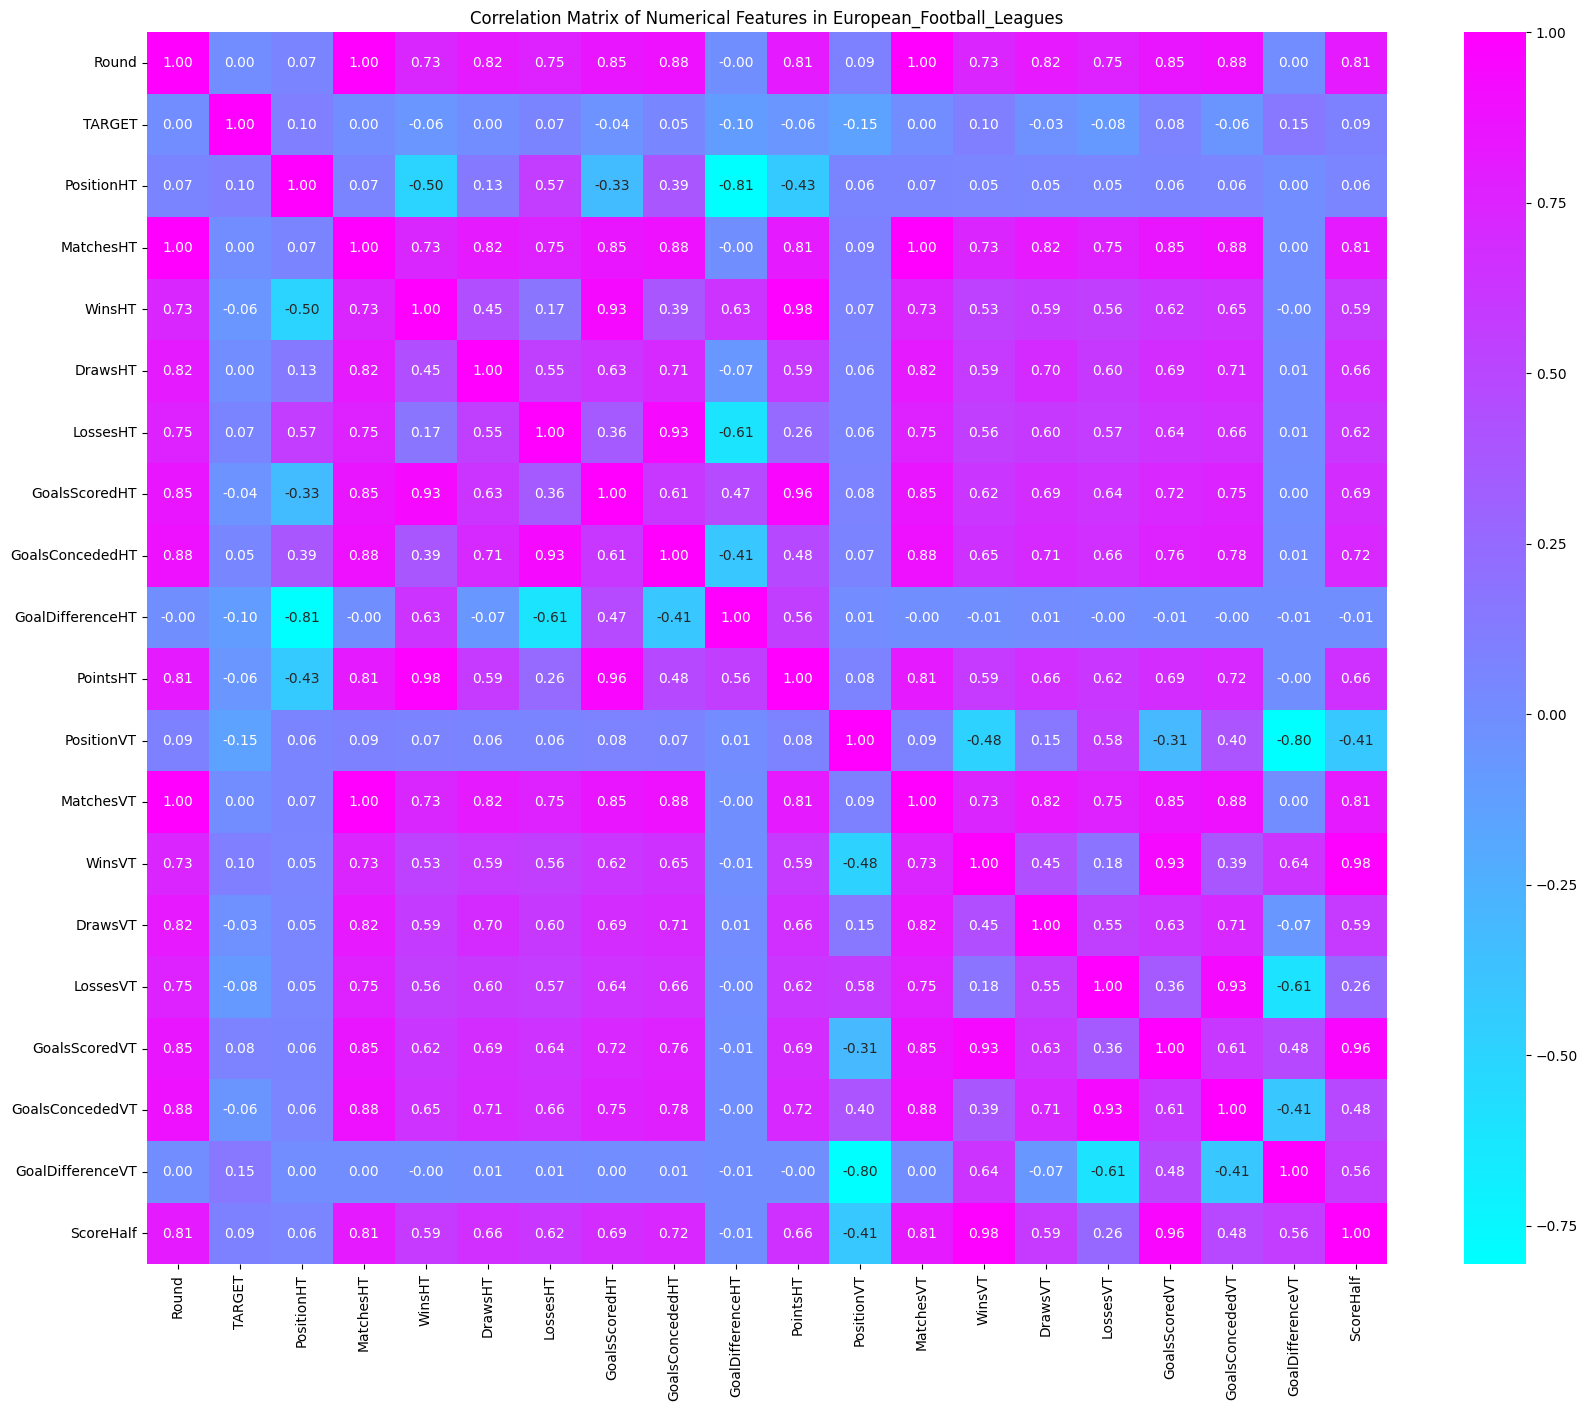

In [17]:
# Selecting only numerical features from the European_Football_Leagues DataFrame
numerical_features = European_Football_Leagues.select_dtypes(include=nmpy.number)

# Calculating the correlation matrix for the selected numerical features
correlation_matrix = numerical_features.corr()

# Setting the figure size for the heatmap
MtPlot.figure(figsize=(20, 16))

# Creating a heatmap using seaborn to visualize correlations, with annotations and a color map
sBorn.heatmap(correlation_matrix, annot=True, cmap='cool', fmt=".2f")

# Adding a title to the heatmap plot
MtPlot.title('Correlation Matrix of Numerical Features in European_Football_Leagues')

# Displaying the plot
MtPlot.show()

In [18]:
# Importing Plotly Express for data visualization
import plotly.express as POX

# Creating a sunburst chart to visualize the hierarchy of Countries and Teams based on Wins
fig = POX.sunburst(
    League_Table,  # Data source is the 'League_Table' DataFrame
    path=['Country', 'Team'],  # Hierarchical path: first by 'Country', then by 'Team'
    values='Wins',  # Size of each sector is based on the 'Wins' column
    color='Wins',  # Coloring the sectors based on the number of 'Wins'
    color_continuous_scale='RdYlBu'  # Using the 'Red-Yellow-Blue' color scale
)

# Updating the layout of the sunburst chart
fig.update_layout(
    title_text='Sunburst Chart of Countries Teams: Wins Ratio',  # Title of the chart
    width=1000,  # Setting the width of the chart
    height=900  # Setting the height of the chart
)

# Displaying the sunburst chart
fig.show()

In [19]:
# Creating a sunburst chart to visualize the hierarchy of Countries and Teams based on Draws
fig = POX.sunburst(
    League_Table,  # Data source is the 'League_Table' DataFrame
    path=['Country', 'Team'],  # Hierarchical path: first by 'Country', then by 'Team'
    values='Draws',  # Size of each sector is based on the 'Draws' column
    color='Draws',  # Coloring the sectors based on the number of 'Draws'
    color_continuous_scale=POX.colors.sequential.Viridis  # Using the 'Viridis' color scale
)

# Updating the layout of the sunburst chart
fig.update_layout(
    title_text='Sunburst Chart of Teams by Country and Draws',  # Title of the chart
    width=1000,  # Setting the width of the chart
    height=900  # Setting the height of the chart
)

# Displaying the sunburst chart
fig.show()

In [20]:
# Creating a sunburst chart to visualize the hierarchy of Countries and Teams based on Losses
fig = POX.sunburst(
    League_Table,  # Data source is the 'League_Table' DataFrame
    path=['Country', 'Team'],  # Hierarchical path: first by 'Country', then by 'Team'
    values='Losses',  # Size of each sector is based on the 'Losses' column
    title='Sunburst Chart of Team Losses by Country',  # Title of the chart
    color='Losses',  # Coloring the sectors based on the number of 'Losses'
    color_continuous_scale='Blues'  # Using the 'Blues' color scale
)

# Updating the layout of the sunburst chart
fig.update_layout(
    width=1000,  # Setting the width of the chart
    height=900  # Setting the height of the chart
)

# Displaying the sunburst chart
fig.show()

In [21]:
# Grouping the European_Football_Leagues DataFrame by 'Country' and 'TARGET' to count occurrences of each outcome
outcome_counts_by_country = European_Football_Leagues.groupby(['Country', 'TARGET'])['TARGET'].count().unstack()

# Creating a grouped bar chart to visualize the distribution of match outcomes by country
fig = POX.bar(outcome_counts_by_country,  # Data for the bar chart
               barmode='group',  # Setting the bar mode to group bars together
               labels={'value': 'Count', 'variable': 'Match Outcome'},  # Labels for the axes
               title='Distribution of Match Outcomes by Country')  # Title of the chart

# Updating the layout to angle the x-axis ticks for better readability
fig.update_layout(xaxis_tickangle=-45)

# Updating the bar chart to display values outside the bars
fig.update_traces(texttemplate='%{value}', textposition='outside')

# Displaying the bar chart
fig.show()

In [22]:
# Creating a new DataFrame with specific attributes for plotting
plot_df = European_Football_Leagues[['MatchesHT', 'WinsHT', 'DrawsHT', 'LossesHT', 'GoalsScoredHT', 'GoalsConcededHT']]

# Creating a scatter plot matrix using Plotly to visualize the distribution of match attributes
fig = POX.scatter_matrix(
    plot_df,  # Data source is the 'plot_df' DataFrame
    dimensions=plot_df.columns,  # Setting the dimensions for the scatter plot matrix
    color='MatchesHT',  # Coloring the points based on the 'MatchesHT' attribute
    height=800,  # Setting the height of the plot
    width=1150,  # Setting the width of the plot
    title='Distribution of Match Attributes'  # Title of the scatter plot matrix
)

# Displaying the scatter plot matrix
fig.show()

In [23]:
# Assuming your dataframe is named European_Football_Leagues
print(European_Football_Leagues.dtypes)

League               object
Season               object
Country              object
Round                 int64
TeamHT               object
TeamVT               object
TARGET                int64
ScoreFull            object
PositionHT          float64
MatchesHT           float64
WinsHT              float64
DrawsHT             float64
LossesHT            float64
GoalsScoredHT       float64
GoalsConcededHT     float64
GoalDifferenceHT    float64
PointsHT            float64
PositionVT          float64
MatchesVT           float64
WinsVT              float64
DrawsVT             float64
LossesVT            float64
GoalsScoredVT       float64
GoalsConcededVT     float64
GoalDifferenceVT    float64
ScoreHalf           float64
dtype: object


### ***Label Encoder***

In [24]:
# Importing LabelEncoder from sklearn to encode categorical variables
le = LabelEncoder()

# Looping through each column in the European_Football_Leagues DataFrame
for column in European_Football_Leagues.columns:
    # Checking if the column data type is 'object' (categorical)
    if European_Football_Leagues[column].dtype == 'object':
        # Applying label encoding to the column to convert categorical values to numeric
        European_Football_Leagues[column] = le.fit_transform(European_Football_Leagues[column])

# Displaying the first few rows of the updated DataFrame
print(European_Football_Leagues.head())

   League  Season  Country  Round  TeamHT  TeamVT  TARGET  ScoreFull  \
0       0       0        0      1       0       7       1         30   
1       0       0        0      1       2      25       2          2   
2       0       0        0      1       4      19       2          2   
3       0       0        0      1      14      17       1         30   
4       0       0        0      1      16       8       0          0   

   PositionHT  MatchesHT  ...  PointsHT  PositionVT  MatchesVT  WinsVT  \
0         1.0        0.0  ...       0.0         1.0        0.0     0.0   
1         1.0        0.0  ...       0.0         1.0        0.0     0.0   
2         1.0        0.0  ...       0.0         1.0        0.0     0.0   
3         1.0        0.0  ...       0.0         1.0        0.0     0.0   
4         1.0        0.0  ...       0.0         1.0        0.0     0.0   

   DrawsVT  LossesVT  GoalsScoredVT  GoalsConcededVT  GoalDifferenceVT  \
0      0.0       0.0            0.0             

In [25]:
# Dropping the 'TARGET' column from the European_Football_Leagues DataFrame to create feature set X
X = European_Football_Leagues.drop(['TARGET'], axis=1)

# Extracting the 'TARGET' column as the target variable y
y = European_Football_Leagues['TARGET']

In [26]:
# checking the values counts of the variable y
y.value_counts()

,count
TARGET,
1,1834
2,1284
0,1062


### ***Data Normalization: MaxAbsScaler***

In [27]:
# Importing MaxAbsScaler from sklearn for feature scaling
scaler = MaxAbsScaler()

# Fitting the scaler to the feature set X and transforming it to normalize the values
X_normalized = scaler.fit_transform(X)  # X_normalized now contains the scaled feature values

### ***Feature Selection: Mututal_info_Classifier***

In [28]:
# Calculating mutual information between the features and the target variable
mutual_info = mutual_info_classif(X_normalized, y)

# Getting the names of the features
feature_names = X.columns

# Creating a DataFrame to store feature names and their corresponding mutual information scores
feature_importance = pndas.DataFrame({'Feature': feature_names, 'Mutual Information': mutual_info})

# Sorting the DataFrame based on mutual information scores in descending order
feature_importance = feature_importance.sort_values('Mutual Information', ascending=False)

# Creating a bar chart to visualize feature importance before feature selection
fig_before = POX.bar(feature_importance,
                    x='Feature',  # X-axis: feature names
                    y='Mutual Information',  # Y-axis: mutual information scores
                    title='Feature Importance Before Feature Selection',  # Title of the chart
                    labels={'Feature': 'Features', 'Mutual Information': 'Mutual Information'},  # Axis labels
                    width=1000, height=600)  # Setting the width and height of the chart
fig_before.update_layout(xaxis_tickangle=-90)  # Angling x-axis ticks for better readability
fig_before.show()  # Displaying the chart

# Selecting the top 15 features based on mutual information scores
top_15_features = feature_importance['Feature'][:15].tolist()

# Creating a new DataFrame with only the top 15 features
X_selected = X[top_15_features]

# Normalizing the selected features
X_selected_normalized = scaler.fit_transform(X_selected)

# Creating a bar chart to visualize feature importance after feature selection (top 15 features)
fig_after = POX.bar(feature_importance.head(15),
                   x='Feature',  # X-axis: feature names
                   y='Mutual Information',  # Y-axis: mutual information scores
                   title='Feature Importance After Feature Selection (Top 15)',  # Title of the chart
                   labels={'Feature': 'Features', 'Mutual Information': 'Mutual Information'},  # Axis labels
                   width=1000, height=600)  # Setting the width and height of the chart
fig_after.update_layout(xaxis_tickangle=-90)  # Angling x-axis ticks for better readability
fig_after.show()  # Displaying the chart

### ***Data Balancing: ADASYN***

In [29]:
# Importing ADASYN from imblearn to handle class imbalance
adasyn = ADASYN(random_state=42)

# Applying ADASYN to generate a resampled dataset with balanced classes
X_resampled, y_resampled = adasyn.fit_resample(X_selected, y)

# Printing the original dataset shape (class distribution)
print("Original dataset shape:", y.value_counts())

# Printing the resampled dataset shape (class distribution after applying ADASYN)
print("Resampled dataset shape:", y_resampled.value_counts())

Original dataset shape: TARGET
1    1834
2    1284
0    1062
Name: count, dtype: int64
Resampled dataset shape: TARGET
0    1952
1    1834
2    1673
Name: count, dtype: int64


### ***Data Splitting TrainSet and TestSet***

In [30]:
XTrainData, XTestData, YTrainData, YTestData = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### ***Model: Stacking Classifier***

In [31]:
# Importing necessaryclassifiers for the StackingModel
model1 = LogisticRegression()  # LogisticRegressionModel
model2 = RandomForestClassifier()  # RandomForestModel
model3 = GradientBoostingClassifier()  # GradientBoostingModel

# Defining the metamodel for stacking
meta_model = LogisticRegression()  # Metamodel for the finalPredictions

# Creating a StackingClassifier using the definedmodels
stacking_model = StackingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('gb', model3)],  # Basemodels
    final_estimator=meta_model  # Metamodel
)

# Fitting the stackingmodel on the training data
stacking_model.fit(XTrainData, YTrainData)

# Predicting on the trainingset using the stackingmodel
y_Stack_TrainSetPred = stacking_model.predict(XTrainData)

# Predicting on the testset using the stackingmodel
y_Stack_TestSetPred = stacking_model.predict(XTestData)

### ***TrainSet_Model***

In [32]:
# Calculating the accuracy of the stacking model on the trainingset
train_accuracy = accuracy_score(YTrainData, y_Stack_TrainSetPred)

# Calculating the precision of the stacking model on the trainingset using macro averaging
train_precision = precision_score(YTrainData, y_Stack_TrainSetPred, average='macro')

# Calculating the recall of the stacking model on the trainingset using macro averaging
train_recall = recall_score(YTrainData, y_Stack_TrainSetPred, average='macro')

# Calculating the F1 score of the stacking model on the trainingset using macro averaging
train_f1 = f1_score(YTrainData, y_Stack_TrainSetPred, average='macro')

# Printing the evaluation metrics for the trainingset
print("Training Set Metrics:")
print("Accuracy :", train_accuracy)  # Displayingaccuracy

print("Precision:", train_precision)  # Displayingprecision

print("Recall   :", train_recall)  # Displayingrecall

print("F1 Score :", train_f1)  # DisplayingF1score

Training Set Metrics:
Accuracy : 0.9940462560109915
Precision: 0.9943006228307897
Recall   : 0.9935152572874654
F1 Score : 0.9938636849881913


### ***Accuracy_of_TrainSetModel = Class 0, Class 1, Class 2***

In [33]:
# Defining a function to calculate the accuracy for a specific class
def class_accuracy(y_true, y_pred, class_label):
    # Getting the indices of the true labels that match the specified class label
    class_indices = (y_true == class_label)
    # Returning the accuracy score for the predictions corresponding to that class
    return accuracy_score(y_true[class_indices], y_pred[class_indices])

# Printing training set metrics
print("Training Set Metrics:")
# Looping through each class label to calculate and print class-specific accuracy
for class_label in [0, 1, 2]:
    # Calculating accuracy for the current class label
    train_class_acc = class_accuracy(YTrainData, y_Stack_TrainSetPred, class_label)
    # Printing the accuracy for the current class
    print(f"Accuracy for Class {class_label}: {train_class_acc:.4f}")

Training Set Metrics:
Accuracy for Class 0: 0.9987
Accuracy for Class 1: 1.0000
Accuracy for Class 2: 0.9818


### ***ClassificationReport_TrainSetMod***

In [34]:
# Generating a classification report for the training set predictions
train_classification_report = classification_report(YTrainData, y_Stack_TrainSetPred)

# Printing the classification report for the training set
print("Training Set Classification Report:\n", train_classification_report)

Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1555
           1       0.99      1.00      0.99      1491
           2       1.00      0.98      0.99      1321

    accuracy                           0.99      4367
   macro avg       0.99      0.99      0.99      4367
weighted avg       0.99      0.99      0.99      4367



### ***ConfusionMatrix_TrainSet***

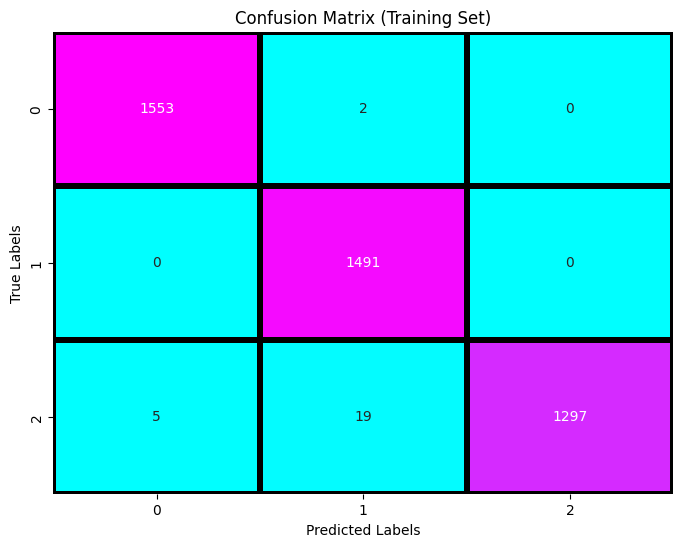

In [35]:
# Generating the confusion matrix for the training set predictions
com_train = confusion_matrix(YTrainData, y_Stack_TrainSetPred)

# Setting up the figure for the heatmap
MtPlot.figure(figsize=(8, 6))
# Creating a heatmap for the confusion matrix
sBorn.heatmap(com_train,
               annot=True,  # Annotate with the counts
               fmt="d",  # Format the annotations as integers
               cmap="cool",  # Colormap for the heatmap
               cbar=False,  # Disable the color bar
               linewidths=4.0,  # Width of lines separating the cells
               linecolor='black')  # Color of the lines separating the cells

# Adding titles and labels to the plot
MtPlot.title("Confusion Matrix (Training Set)")  # Title of the plot
MtPlot.xlabel("Predicted Labels")  # X-axis label
MtPlot.ylabel("True Labels")  # Y-axis label

# Displaying the confusion matrix heatmap
MtPlot.show()

### ***ROC_AUC-Curve of TrainSetModel***

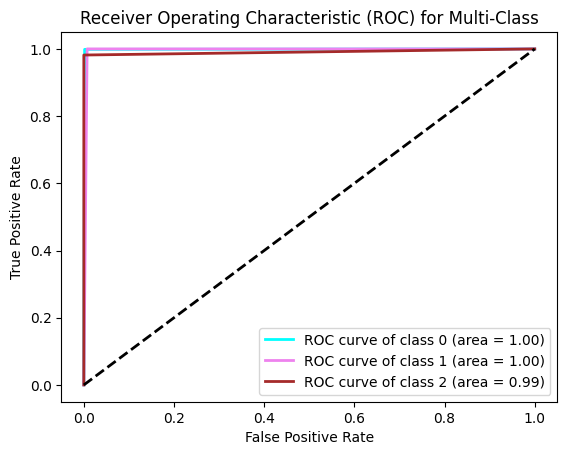

In [36]:
# Binarizing the true labels for multi-class ROC analysis
YTrainData_bin = label_binarize(YTrainData, classes=[0, 1, 2])
# Binarizing the predicted labels for multi-class ROC analysis
y_Stack_TrainSetPred_bin = label_binarize(y_Stack_TrainSetPred, classes=[0, 1, 2])

# Initializing dictionaries to store false positive rates, true positive rates, and ROC AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = YTrainData_bin.shape[1]  # Number of classes

# Calculating the ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(YTrainData_bin[:, i], y_Stack_TrainSetPred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Setting up the figure for the ROC curves
MtPlot.figure()
lw = 2  # Line width for the curves
colors = cycle(['aqua', 'violet', 'brown'])  # Colors for the ROC curves

# Plotting the ROC curve for each class
for i, color in zip(range(n_classes), colors):
    MtPlot.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                      ''.format(i, roc_auc[i]))

# Adding a dashed line representing the chance level
MtPlot.plot([0, 1], [0, 1], 'k--', lw=lw)
# Adding labels and title to the plot
MtPlot.xlabel('False Positive Rate')  # X-axis label
MtPlot.ylabel('True Positive Rate')  # Y-axis label
MtPlot.title('Receiver Operating Characteristic (ROC) for Multi-Class')  # Title of the plot
# Adding the legend for the plot
MtPlot.legend(loc="lower right")
# Displaying the ROC curves
MtPlot.show()

### ***TestSet_Model***

In [37]:
# Calculating accuracy for the test set predictions
test_accuracy = accuracy_score(YTestData, y_Stack_TestSetPred)

# Calculating precision for the test set predictions
test_precision = precision_score(YTestData, y_Stack_TestSetPred, average='macro')

# Calculating recall for the test set predictions
test_recall = recall_score(YTestData, y_Stack_TestSetPred, average='macro')

# Calculating F1 score for the test set predictions
test_f1 = f1_score(YTestData, y_Stack_TestSetPred, average='macro')

# Printing the evaluation metrics for the testset
print("Test Set Metrics:")
print("Accuracy :", test_accuracy)  # Displayingaccuracy

print("Precision:", test_precision)  # Displayingprecision

print("Recall   :", test_recall)  # Displayingrecall

print("F1 Score :", test_f1)  # DisplayingF1score

Test Set Metrics:
Accuracy : 0.9276556776556777
Precision: 0.9276824923601946
Recall   : 0.9300196549881689
F1 Score : 0.9278321828926686


### ***Accuracy_of_TestSetModel = Class 0, Class 1, Class 2***

In [38]:
for class_label in [0, 1, 2]:
    test_class_acc = class_accuracy(YTestData, y_Stack_TestSetPred, class_label)
    print(f"Test Set Accuracy for Class {class_label}: {test_class_acc:.4f}")

Test Set Accuracy for Class 0: 0.8866
Test Set Accuracy for Class 1: 1.0000
Test Set Accuracy for Class 2: 0.9034


### ***ClassificationReport_TestSet***

In [39]:
# Generating a classificationreport for the test set predictions
report = classification_report(YTestData, y_Stack_TestSetPred)
# Printing the classificationreport
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       397
           1       0.91      1.00      0.95       343
           2       0.93      0.90      0.92       352

    accuracy                           0.93      1092
   macro avg       0.93      0.93      0.93      1092
weighted avg       0.93      0.93      0.93      1092



### ***ConfusionMatrix_TestSet***

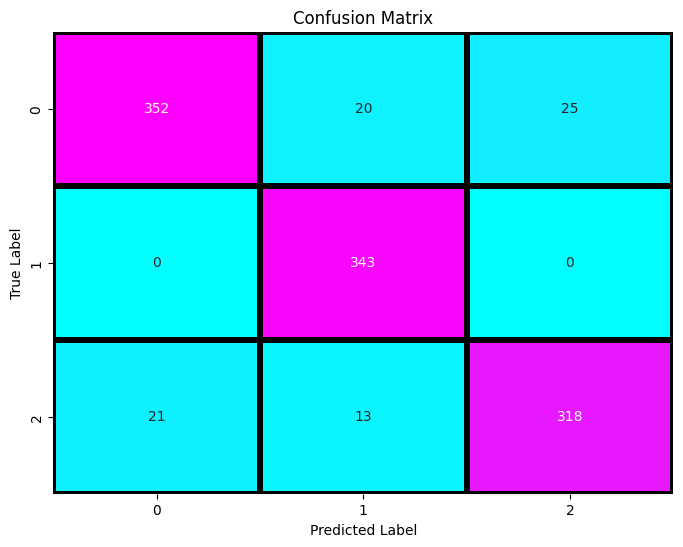

In [40]:
# Creating a confusionmatrix for the testset predictions
confm = confusion_matrix(YTestData, y_Stack_TestSetPred)

# Setting the figure size for the confusionmatrix plot
MtPlot.figure(figsize=(8, 6))
# Plotting the heatmap of the confusionmatrix with annotations
sBorn.heatmap(confm, annot=True, fmt="d", cmap="cool", cbar=False, linewidths=4.0, linecolor='black')

# Adding titles and labels to the plot
MtPlot.title('Confusion Matrix')
MtPlot.xlabel('Predicted Label')
MtPlot.ylabel('True Label')
MtPlot.show()

### ***ROC_AUC-Curve of TestSetModel***

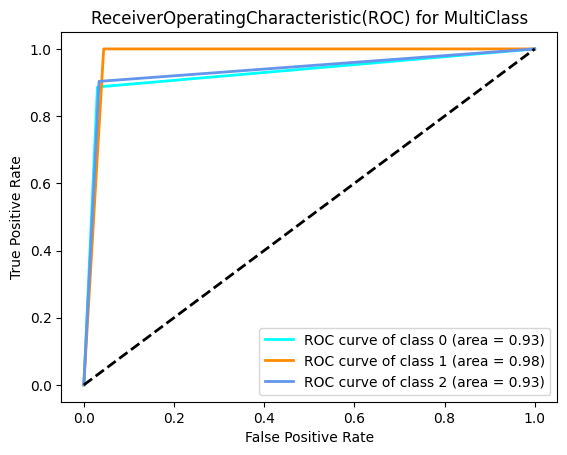

In [41]:
# Binarizing the test data and predictions for multi-class ROC analysis
YTestData_bin = label_binarize(YTestData, classes=[0, 1, 2])
y_Stack_TestSetPred_bin = label_binarize(y_Stack_TestSetPred, classes=[0, 1, 2])

# Initializing dictionaries to store false positive rates, true positive rates, and AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = YTestData_bin.shape[1]  # Number of classes

# Calculating the ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(YTestData_bin[:, i], y_Stack_TestSetPred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Creating a new figure for the ROC plot
MtPlot.figure()
lw = 2  # Line width for the plot
# Defining colors for the different classes
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# Plotting the ROC curve for each class
for i, color in zip(range(n_classes), colors):
    MtPlot.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Adding the diagonal line (no discrimination line)
MtPlot.plot([0, 1], [0, 1], 'k--', lw=lw)

# Adding labels and title to the plot
MtPlot.xlabel('False Positive Rate')
MtPlot.ylabel('True Positive Rate')
MtPlot.title('ReceiverOperatingCharacteristic(ROC) for MultiClass')
MtPlot.legend(loc="lower right")
MtPlot.show()

### ***Model Result Comparision Trainset and Testset***

In [42]:
# Define metrics and their respective values for training and testsets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_values = [train_accuracy, train_precision, train_recall, train_f1]
test_values = [test_accuracy, test_precision, test_recall, test_f1]

# Create a grouped bar chart
fig = go.Figure(data=[
    go.Bar(name='Training Set', x=metrics, y=train_values,
           text=[f'{v:.4f}' for v in train_values],
           textposition='outside'),
    go.Bar(name='Test Set', x=metrics, y=test_values,
           text=[f'{v:.4f}' for v in test_values],
           textposition='outside')
])

# Update the layout for the figure
fig.update_layout(
    barmode='group',
    title='Comparison of Model Performance (Training vs. Test)',
    xaxis_title='Metrics',
    yaxis_title='Score',
    width=1000,
    height=600
)

# Display the figure
fig.show()